# Telecom X – Parte 2: Predicción de Cancelación (Churn)

## 1. Introducción

### 📣 Historia del Desafío

¡Felicidades! 🎉 Has sido promovido después de tu excelente desempeño en el análisis exploratorio de la cancelación de clientes en Telecom X. Tu dedicación, claridad al comunicar los datos y visión estratégica marcaron la diferencia.

In [28]:
# Mi Challenge Telecom X - Parte 1
# https://github.com/freedox-cts/challenge-telecom-x

Ahora, ¡has sido invitado oficialmente a formar parte del equipo de Machine Learning de la empresa!

### 🎯 Misión

Tu nueva misión es desarrollar modelos predictivos capaces de prever qué clientes tienen mayor probabilidad de cancelar sus servicios.

La empresa quiere anticiparse al problema de la cancelación, y te corresponde a ti construir un pipeline robusto para esta etapa inicial de modelado.

### 🧠 Objetivos del Desafío

1 - Preparar los datos para el modelado (tratamiento, codificación, normalización).

2 - Realizar análisis de correlación y selección de variables.

3 - Entrenar dos o más modelos de clasificación.

4 - Evaluar el rendimiento de los modelos con métricas.

5 - Interpretar los resultados, incluyendo la importancia de las variables.

6 - Crear una conclusión estratégica señalando los principales factores que influyen en la cancelación.

### 🧰 Lo que vas a practicar

- ✅ Preprocesamiento de datos para Machine Learning
- ✅ Construcción y evaluación de modelos predictivos
- ✅ Interpretación de resultados y entrega de insights
- ✅ Comunicación técnica con enfoque estratégico

## 2. 🛠️ Preparación de los Datos

### Importar Librerias

In [44]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import yellowbrick

print(f'Versión de pandas: {pd.__version__}')
print(f'Versión de numpy: {np.__version__}')
print(f'Versión de scikit-learn (sklearn): {sklearn.__version__}')
print(f'Versión de seaborn: {sns.__version__}')
print(f'Versión de yellowbrick: {yellowbrick.__version__}')

Versión de pandas: 2.2.2
Versión de numpy: 2.0.2
Versión de scikit-learn (sklearn): 1.6.1
Versión de seaborn: 0.13.2
Versión de yellowbrick: 1.5


### Extracción del Archivo Tratado

In [30]:
url = 'https://github.com/freedox-cts/challenge-telecom-x/raw/refs/heads/main/TelecomX_Data_intervenido.csv'

datos = pd.read_csv(url)

datos.shape

(7267, 22)

In [31]:
datos.head()

,id_cliente,cancelacion,genero,mayor_65,pareja,dependientes,antiguedad,serv_telefonico,multip_lineas,serv_internet,...,proteccion_dispositivo,serv_tecnico,tv_streaming,peliculas_streaming,contrato,boleta_electronica,metodo_pago,pago_mensual,pago_total,cuentas_diarias
0,0002-ORFBO,0,Femenino,0,1,1,9,1,0,DSL,...,0,1,1,0,Anual,1,Cheque por correo,65.6,593.30,2.19
1,0003-MKNFE,0,Masculino,0,0,0,9,1,1,DSL,...,0,0,0,1,Mensual,0,Cheque por correo,59.9,542.40,2.00
2,0004-TLHLJ,1,Masculino,0,0,0,4,1,0,Fibra optica,...,1,0,0,0,Mensual,1,Cheque electrónico,73.9,280.85,2.46
3,0011-IGKFF,1,Masculino,1,1,0,13,1,0,Fibra optica,...,1,0,1,1,Mensual,1,Cheque electrónico,98.0,1237.85,3.27
4,0013-EXCHZ,1,Femenino,1,1,0,3,1,0,Fibra optica,...,0,1,1,0,Mensual,1,Cheque por correo,83.9,267.40,2.80


### Eliminación de Columnas Irrelevantes

In [32]:
datos = datos.drop(['id_cliente'], axis=1)

Columna 'id_clientes' eliminada

In [33]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cancelacion             7267 non-null   int64  
 1   genero                  7267 non-null   object 
 2   mayor_65                7267 non-null   int64  
 3   pareja                  7267 non-null   int64  
 4   dependientes            7267 non-null   int64  
 5   antiguedad              7267 non-null   int64  
 6   serv_telefonico         7267 non-null   int64  
 7   multip_lineas           7267 non-null   int64  
 8   serv_internet           7267 non-null   object 
 9   seguridad_online        7267 non-null   int64  
 10  respaldo_online         7267 non-null   int64  
 11  proteccion_dispositivo  7267 non-null   int64  
 12  serv_tecnico            7267 non-null   int64  
 13  tv_streaming            7267 non-null   int64  
 14  peliculas_streaming     7267 non-null   

Variables Numéricas

In [34]:
datos.describe()

,cancelacion,mayor_65,pareja,dependientes,antiguedad,serv_telefonico,multip_lineas,seguridad_online,respaldo_online,proteccion_dispositivo,serv_tecnico,tv_streaming,peliculas_streaming,boleta_electronica,pago_mensual,pago_total,cuentas_diarias
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.257190,0.162653,0.484106,0.300124,32.346498,0.902711,0.421770,0.285950,0.344571,0.342782,0.289528,0.383927,0.387505,0.593230,64.720098,2277.182035,2.157292
std,0.437115,0.369074,0.499782,0.458343,24.571773,0.296371,0.493876,0.451897,0.475261,0.474672,0.453575,0.486374,0.487214,0.491265,30.129572,2268.648587,1.004407
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.610000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.425000,396.200000,1.180000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.300000,1389.200000,2.340000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.875000,3778.525000,2.995000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.960000


Variables Categóricas

In [35]:
datos.describe(include='object')

,genero,serv_internet,contrato,metodo_pago
count,7267,7267,7267,7267
unique,2,3,3,4
top,Masculino,Fibra optica,Mensual,Cheque electrónico
freq,3675,3198,4005,2445


### Encoding

Transforma las variables categóricas a formato numérico para hacerlas compatibles con los algoritmos de machine learning. Utiliza un método de codificación adecuado, como one-hot encoding.

In [36]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [37]:
var_categoricas = datos.select_dtypes(include='object').columns.tolist()
var_categoricas

['genero', 'serv_internet', 'contrato', 'metodo_pago']

In [38]:
one_hot = make_column_transformer((OneHotEncoder(drop='if_binary'),var_categoricas),
                                  remainder='passthrough',
                                  sparse_threshold=0,
                                  force_int_remainder_cols=False)

In [39]:
datos_transformados = one_hot.fit_transform(datos)
datos_transformados

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 6.56000e+01,
        5.93300e+02, 2.19000e+00],
       [1.00000e+00, 1.00000e+00, 0.00000e+00, ..., 5.99000e+01,
        5.42400e+02, 2.00000e+00],
       [1.00000e+00, 0.00000e+00, 1.00000e+00, ..., 7.39000e+01,
        2.80850e+02, 2.46000e+00],
       ...,
       [1.00000e+00, 1.00000e+00, 0.00000e+00, ..., 5.03000e+01,
        9.27500e+01, 1.68000e+00],
       [1.00000e+00, 1.00000e+00, 0.00000e+00, ..., 6.78500e+01,
        4.62765e+03, 2.26000e+00],
       [1.00000e+00, 1.00000e+00, 0.00000e+00, ..., 5.90000e+01,
        3.70760e+03, 1.97000e+00]])

In [40]:
datos_transformados = pd.DataFrame(datos_transformados, columns=one_hot.get_feature_names_out())
datos_transformados

,onehotencoder__genero_Masculino,onehotencoder__serv_internet_DSL,onehotencoder__serv_internet_Fibra optica,onehotencoder__serv_internet_No,onehotencoder__contrato_Anual,onehotencoder__contrato_Bi-anual,onehotencoder__contrato_Mensual,onehotencoder__metodo_pago_Cheque electrónico,onehotencoder__metodo_pago_Cheque por correo,onehotencoder__metodo_pago_Tarjeta de crédito (automático),...,remainder__seguridad_online,remainder__respaldo_online,remainder__proteccion_dispositivo,remainder__serv_tecnico,remainder__tv_streaming,remainder__peliculas_streaming,remainder__boleta_electronica,remainder__pago_mensual,remainder__pago_total,remainder__cuentas_diarias
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,65.60,593.30,2.19
1,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,59.90,542.40,2.00
2,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,73.90,280.85,2.46
3,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,98.00,1237.85,3.27
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,83.90,267.40,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,55.15,742.90,1.84
7263,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,85.10,1873.70,2.84
7264,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,50.30,92.75,1.68
7265,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,67.85,4627.65,2.26


In [41]:
import pickle
with open('one_hot_enc.pkl', 'wb') as file:
    pickle.dump(one_hot, file)

### Verificación de la Proporción de Cancelación (Churn)

- Calcula la proporción de clientes que cancelaron en relación con los que permanecieron activos.
- Evalúa si existe un desbalance entre las clases, ya que esto puede impactar en los modelos predictivos y en el análisis de los resultados.

In [48]:
# cantidad de cancelación y no cancelación
cant_cancelación = datos['cancelacion'].value_counts().reset_index()
cant_cancelación['cancelacion'] = cant_cancelación['cancelacion'].map({0: 'no canceló', 1: 'canceló'})
cant_cancelación.columns = ['cancelacion', 'cantidad']
cant_cancelación

,cancelacion,cantidad
0,no canceló,5398
1,canceló,1869


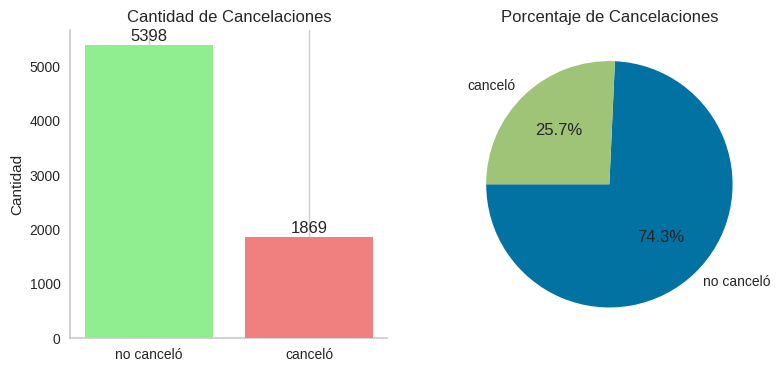

In [50]:
fig, axs = plt.subplots(1,2, figsize=(9, 4))

barras = axs[0].bar(cant_cancelación['cancelacion'], cant_cancelación['cantidad'], color=['lightgreen', 'lightcoral'], zorder=5)
axs[0].set_title('Cantidad de Cancelaciones')
axs[0].set_ylabel('Cantidad')
axs[0].set_facecolor('white')
axs[0].grid(axis='y')
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)

# agrego valores encima de cada barra
for barra in barras:
    yval = barra.get_height()
    axs[0].text(barra.get_x() + barra.get_width()/2, yval + 10, round(yval, 2), ha='center', va='bottom')


axs[1].pie(cant_cancelación['cantidad'], labels=cant_cancelación['cancelacion'], autopct='%1.1f%%', startangle=180)
axs[1].set_title('Porcentaje de Cancelaciones')

# guardar el gráfico como imagen PNG
plt.savefig('1-cancelaciones.png', format='png');

- Se podría inferir que existe cierto desbalance entre clases.
- Se evaluará con resultados de modelos si es necesario balancear las clases.

### Balanceo de Clases (opcional)

Si deseas profundizar en el análisis, aplica técnicas de balanceo como undersampling o oversampling. En situaciones de fuerte desbalanceo, herramientas como SMOTE pueden ser útiles para generar ejemplos sintéticos de la clase minoritaria.

### Normalización o Estandarización (para Modelo elegido KNN)

La fórmula matemática que figura a continuación nos permite normalizar los datos:

$X_{sc} = \frac{X - X_{min}}{X_{max} - X_{min}} $

In [52]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
normalizacion = MinMaxScaler()
X_train_normalizado = normalizacion.fit_transform(X_train)
#X_test = normalizacion.transform(X_test)

## 3. 🎯 Correlación y Selección de Variables

In [40]:
X = datos.drop(columns=['adherencia_inversion'],axis=1)
y = datos['adherencia_inversion']